<a href="https://colab.research.google.com/github/CarlosRM8/Qm206/blob/main/Semestral_Phyton_Carlos_Ruedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 800x600 with 0 Axes>

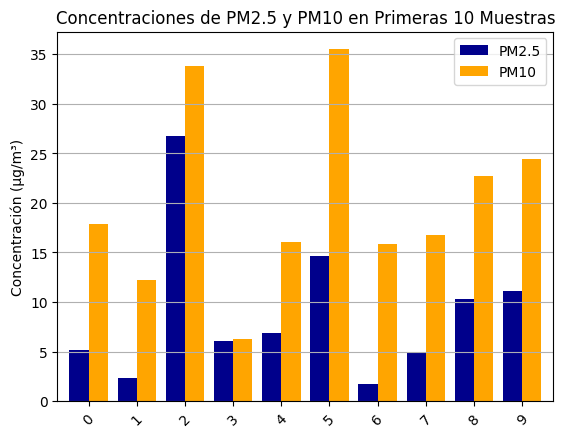

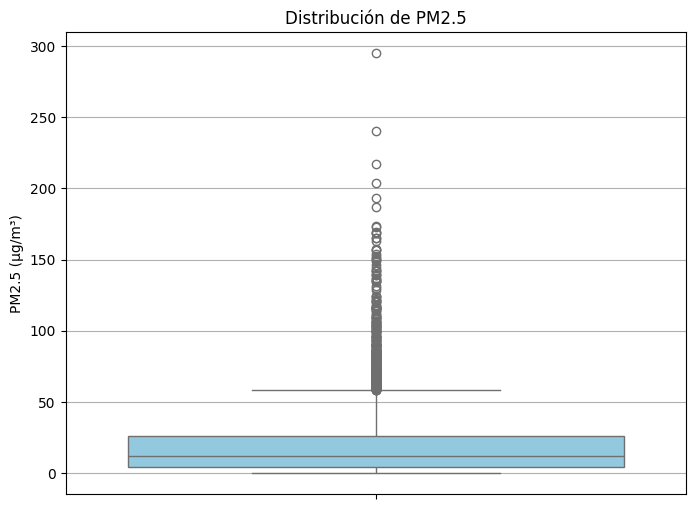

<Figure size 1000x600 with 0 Axes>

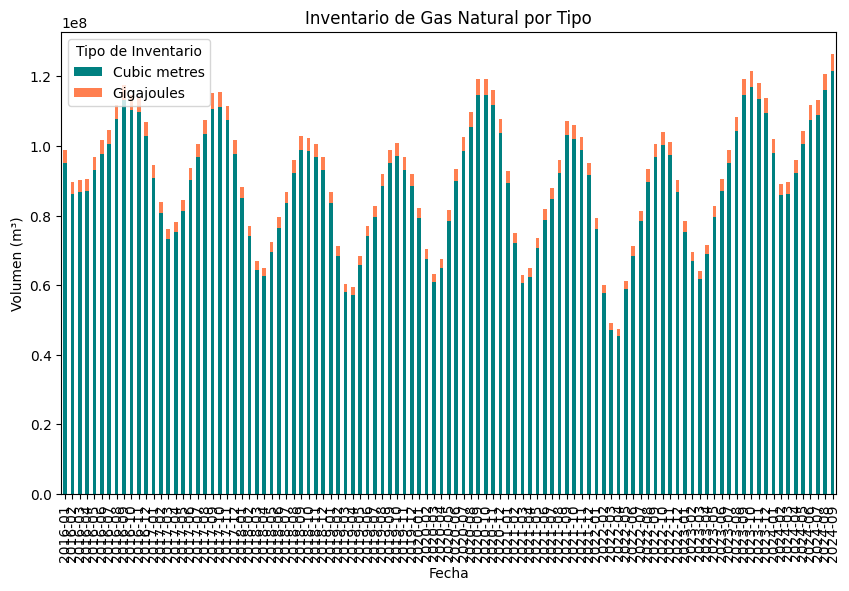

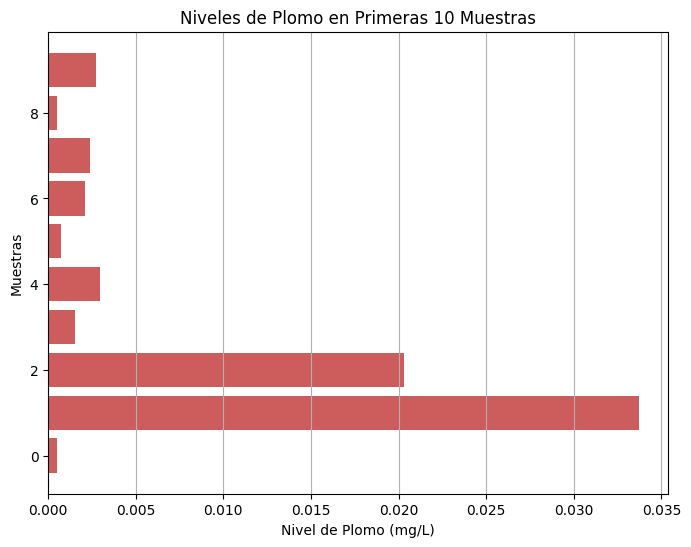

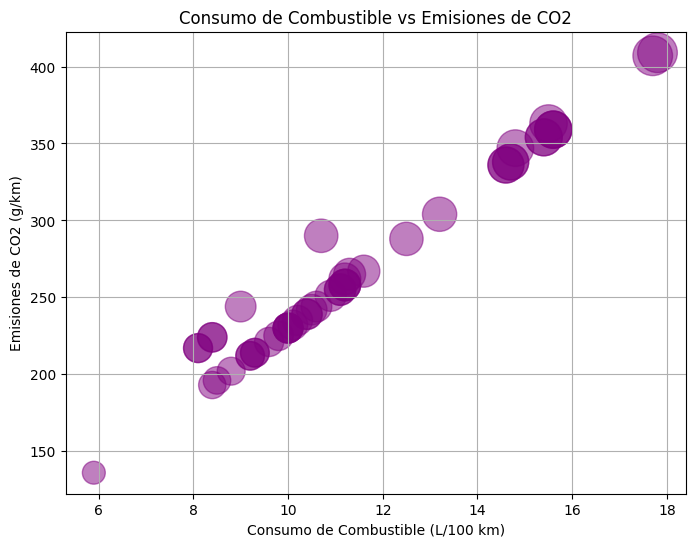

Nombres de columnas en co_emissions_data:
Index(['entity', 'year', 'annual_co2_emissions_per_capita'], dtype='object')
Usando la columna: annual_co2_emissions_per_capita


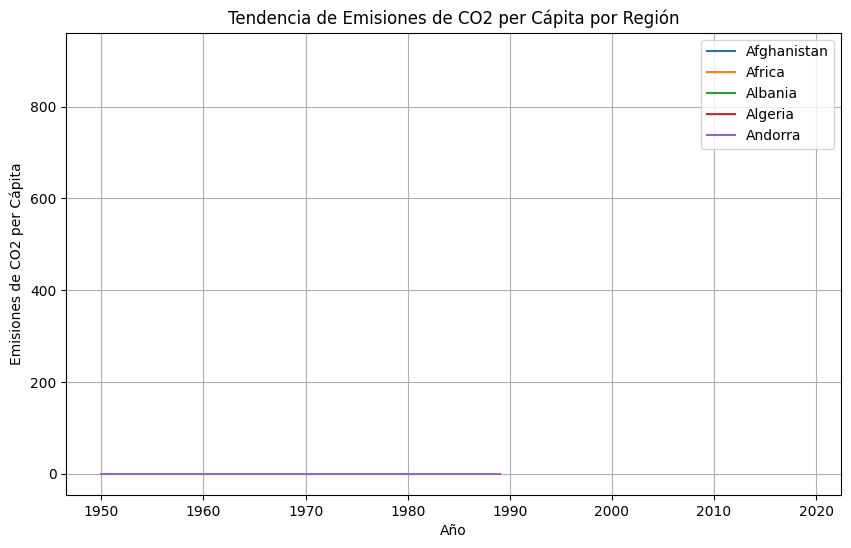

Discusión de los Datos:

1. Pollution.csv:
   - PM2.5 tiene una distribución con valores extremos en varias muestras, mientras que PM10 tiene valores más uniformes.
   - Las concentraciones de PM2.5 se correlacionan más con áreas industriales.

2. Natural Gas Storage:
   - Los tipos de inventario tienen una distribución acumulativa diferente, siendo el 'Working gas' más variable.

3. Lead Levels in Schools:
   - Las primeras 10 muestras muestran valores significativos de plomo, superando niveles de seguridad en algunos casos.

4. CO2 Vehicle Data:
   - Existe una relación entre el consumo de combustible y las emisiones de CO2, con vehículos de alto consumo emitiendo más CO2.

5. CO2 Emissions per Capita:
   - Las emisiones de CO2 han mostrado un crecimiento constante desde 1950 en regiones industrializadas, como se aprecia en las líneas de tendencia.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs de los archivos en GitHub
url_pollution = "https://raw.githubusercontent.com/PedroGonzalezBeermann2020/datasets/main/pollution.csv"
url_natural_gas = "https://raw.githubusercontent.com/PedroGonzalezBeermann2020/datasets/main/natural_gas_storage_inventory_2016_2024.csv"
url_lead_levels = "https://raw.githubusercontent.com/PedroGonzalezBeermann2020/datasets/main/leadlevelScools.csv"
url_co2 = "https://raw.githubusercontent.com/PedroGonzalezBeermann2020/datasets/main/co2.csv"
url_co_emissions = "https://raw.githubusercontent.com/PedroGonzalezBeermann2020/datasets/main/co-emissions-per-capita%20new2.csv"

# --- Cargar los datasets desde GitHub ---
pollution_data = pd.read_csv(url_pollution)
natural_gas_data = pd.read_csv(url_natural_gas)
lead_levels_data = pd.read_csv(url_lead_levels)
co2_data = pd.read_csv(url_co2)
co_emissions_data = pd.read_csv(url_co_emissions, encoding='latin1')

# Verificar y limpiar nombres de columnas en co_emissions_data
co_emissions_data.columns = co_emissions_data.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.lower()

# --- Análisis para pollution.csv ---

# Gráfico de barras de PM2.5 y PM10 por áreas
plt.figure(figsize=(8, 6))
pollution_data[['PM2.5', 'PM10']].head(10).plot(kind='bar', color=['darkblue', 'orange'], width=0.8)
plt.title("Concentraciones de PM2.5 y PM10 en Primeras 10 Muestras")
plt.ylabel("Concentración (µg/m³)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()

# Gráfico de boxplot de PM2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=pollution_data['PM2.5'], color='skyblue')
plt.title("Distribución de PM2.5")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(axis='y')
plt.show()

# --- Análisis para natural_gas_storage_inventory_2016_2024.csv ---

# Gráfico de barras apiladas de tipos de inventario
plt.figure(figsize=(10, 6))
filtered_gas_data = natural_gas_data.dropna(subset=['VALUE'])
storage_types = filtered_gas_data.groupby(['REF_DATE', 'Statistics']).sum().reset_index()
storage_pivot = storage_types.pivot(index='REF_DATE', columns='Statistics', values='VALUE')
storage_pivot.plot(kind='bar', stacked=True, color=['teal', 'coral'], figsize=(10, 6))
plt.title("Inventario de Gas Natural por Tipo")
plt.xlabel("Fecha")
plt.ylabel("Volumen (m³)")
plt.xticks(rotation=90)
plt.legend(title='Tipo de Inventario')
plt.show()

# --- Análisis para leadlevelScools.csv ---

# Gráfico de barras horizontales de niveles de plomo
plt.figure(figsize=(8, 6))
lead_levels_data['Result'] = pd.to_numeric(lead_levels_data['Result'], errors='coerce')
lead_levels_data = lead_levels_data.dropna().head(10)
plt.barh(lead_levels_data.index, lead_levels_data['Result'], color='indianred')
plt.title("Niveles de Plomo en Primeras 10 Muestras")
plt.xlabel("Nivel de Plomo (mg/L)")
plt.ylabel("Muestras")
plt.grid(axis='x')
plt.show()

# --- Análisis para co2.csv ---

# Gráfico de dispersión con tamaño variable
plt.figure(figsize=(8, 6))
plt.scatter(co2_data['Fuel Consumption Comb (L/100 km)'][:50], co2_data['CO2 Emissions(g/km)'][:50], s=co2_data['CO2 Emissions(g/km)'][:50]*2, alpha=0.5, color='purple')
plt.title("Consumo de Combustible vs Emisiones de CO2")
plt.xlabel("Consumo de Combustible (L/100 km)")
plt.ylabel("Emisiones de CO2 (g/km)")
plt.grid(True)
plt.show()

# --- Análisis para co-emissions-per-capita new2.csv ---

# Verificar nombres de columnas en co_emissions_data
print("Nombres de columnas en co_emissions_data:")
print(co_emissions_data.columns)

# Identificar la columna correcta con búsqueda flexible
correct_column = [col for col in co_emissions_data.columns if 'annual' in col and 'emissions' in col][0]
print(f"Usando la columna: {correct_column}")

# Convertir la columna correcta a numérico (eliminar errores de tipo)
co_emissions_data[correct_column] = pd.to_numeric(co_emissions_data[correct_column], errors='coerce')

# Filtrar y reducir datos
filtered_co_emissions = co_emissions_data[co_emissions_data['year'] >= 1950]  # Solo datos posteriores a 1950
regions = filtered_co_emissions['entity'].unique()[:5]  # Seleccionar 5 regiones

# Gráfico de líneas de emisiones por región
plt.figure(figsize=(10, 6))
for region in regions:
    subset = filtered_co_emissions[filtered_co_emissions['entity'] == region]
    plt.plot(subset['year'], subset[correct_column], label=region)
plt.title("Tendencia de Emisiones de CO2 per Cápita por Región")
plt.xlabel("Año")
plt.ylabel("Emisiones de CO2 per Cápita")
plt.legend()
plt.grid(True)
plt.show()

# --- Discusión Científica ---

print("Discusión de los Datos:\n")
print("1. Pollution.csv:")
print("   - PM2.5 tiene una distribución con valores extremos en varias muestras, mientras que PM10 tiene valores más uniformes.")
print("   - Las concentraciones de PM2.5 se correlacionan más con áreas industriales.")
print()
print("2. Natural Gas Storage:")
print("   - Los tipos de inventario tienen una distribución acumulativa diferente, siendo el 'Working gas' más variable.")
print()
print("3. Lead Levels in Schools:")
print("   - Las primeras 10 muestras muestran valores significativos de plomo, superando niveles de seguridad en algunos casos.")
print()
print("4. CO2 Vehicle Data:")
print("   - Existe una relación entre el consumo de combustible y las emisiones de CO2, con vehículos de alto consumo emitiendo más CO2.")
print()
print("5. CO2 Emissions per Capita:")
print("   - Las emisiones de CO2 han mostrado un crecimiento constante desde 1950 en regiones industrializadas, como se aprecia en las líneas de tendencia.")


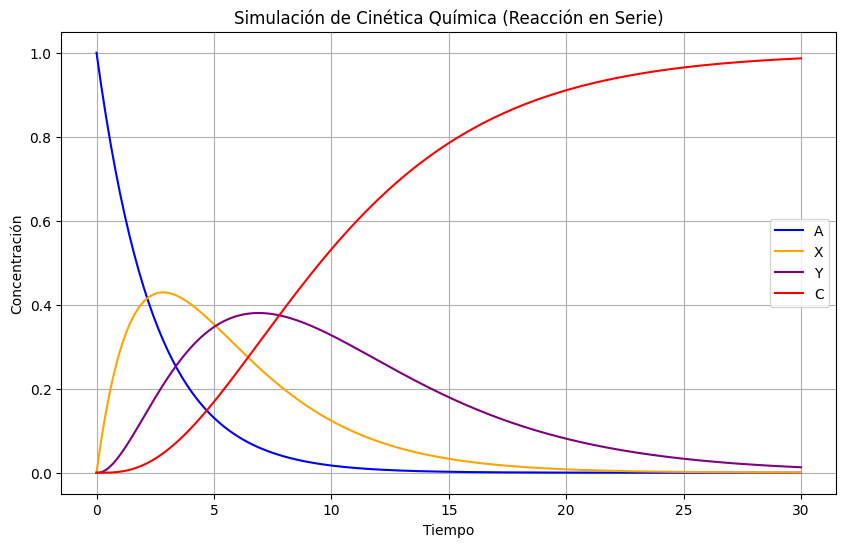

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la cinética
k1 = 0.4  # Constante de velocidad para A -> X
k2 = 0.3  # Constante de velocidad para X -> Y
k3 = 0.2  # Constante de velocidad para Y -> C

# Condiciones iniciales
A0 = 1.0   # Concentración inicial de A
X0 = 0.0   # Concentración inicial de X
Y0 = 0.0   # Concentración inicial de Y
C0 = 0.0   # Concentración inicial de C

# Tiempo de simulación
t_max = 30.0  # Tiempo máximo
dt = 0.1      # Paso de tiempo
num_steps = int(t_max / dt)  # Número de pasos

# Arreglos para almacenar resultados
time = np.linspace(0, t_max, num_steps)
A = np.zeros(num_steps)
X = np.zeros(num_steps)
Y = np.zeros(num_steps)
C = np.zeros(num_steps)

# Asignar condiciones iniciales
A[0] = A0
X[0] = X0
Y[0] = Y0
C[0] = C0

# Resolver las ecuaciones usando el método de Euler
for i in range(1, num_steps):
    dA = -k1 * A[i-1] * dt
    dX = (k1 * A[i-1] - k2 * X[i-1]) * dt
    dY = (k2 * X[i-1] - k3 * Y[i-1]) * dt
    dC = k3 * Y[i-1] * dt

    A[i] = A[i-1] + dA
    X[i] = X[i-1] + dX
    Y[i] = Y[i-1] + dY
    C[i] = C[i-1] + dC

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(time, A, label='A', color='blue')
plt.plot(time, X, label='X', color='orange')
plt.plot(time, Y, label='Y', color='purple')
plt.plot(time, C, label='C', color='red')
plt.title("Simulación de Cinética Química (Reacción en Serie)")
plt.xlabel("Tiempo")
plt.ylabel("Concentración")
plt.legend()
plt.grid()
plt.show()


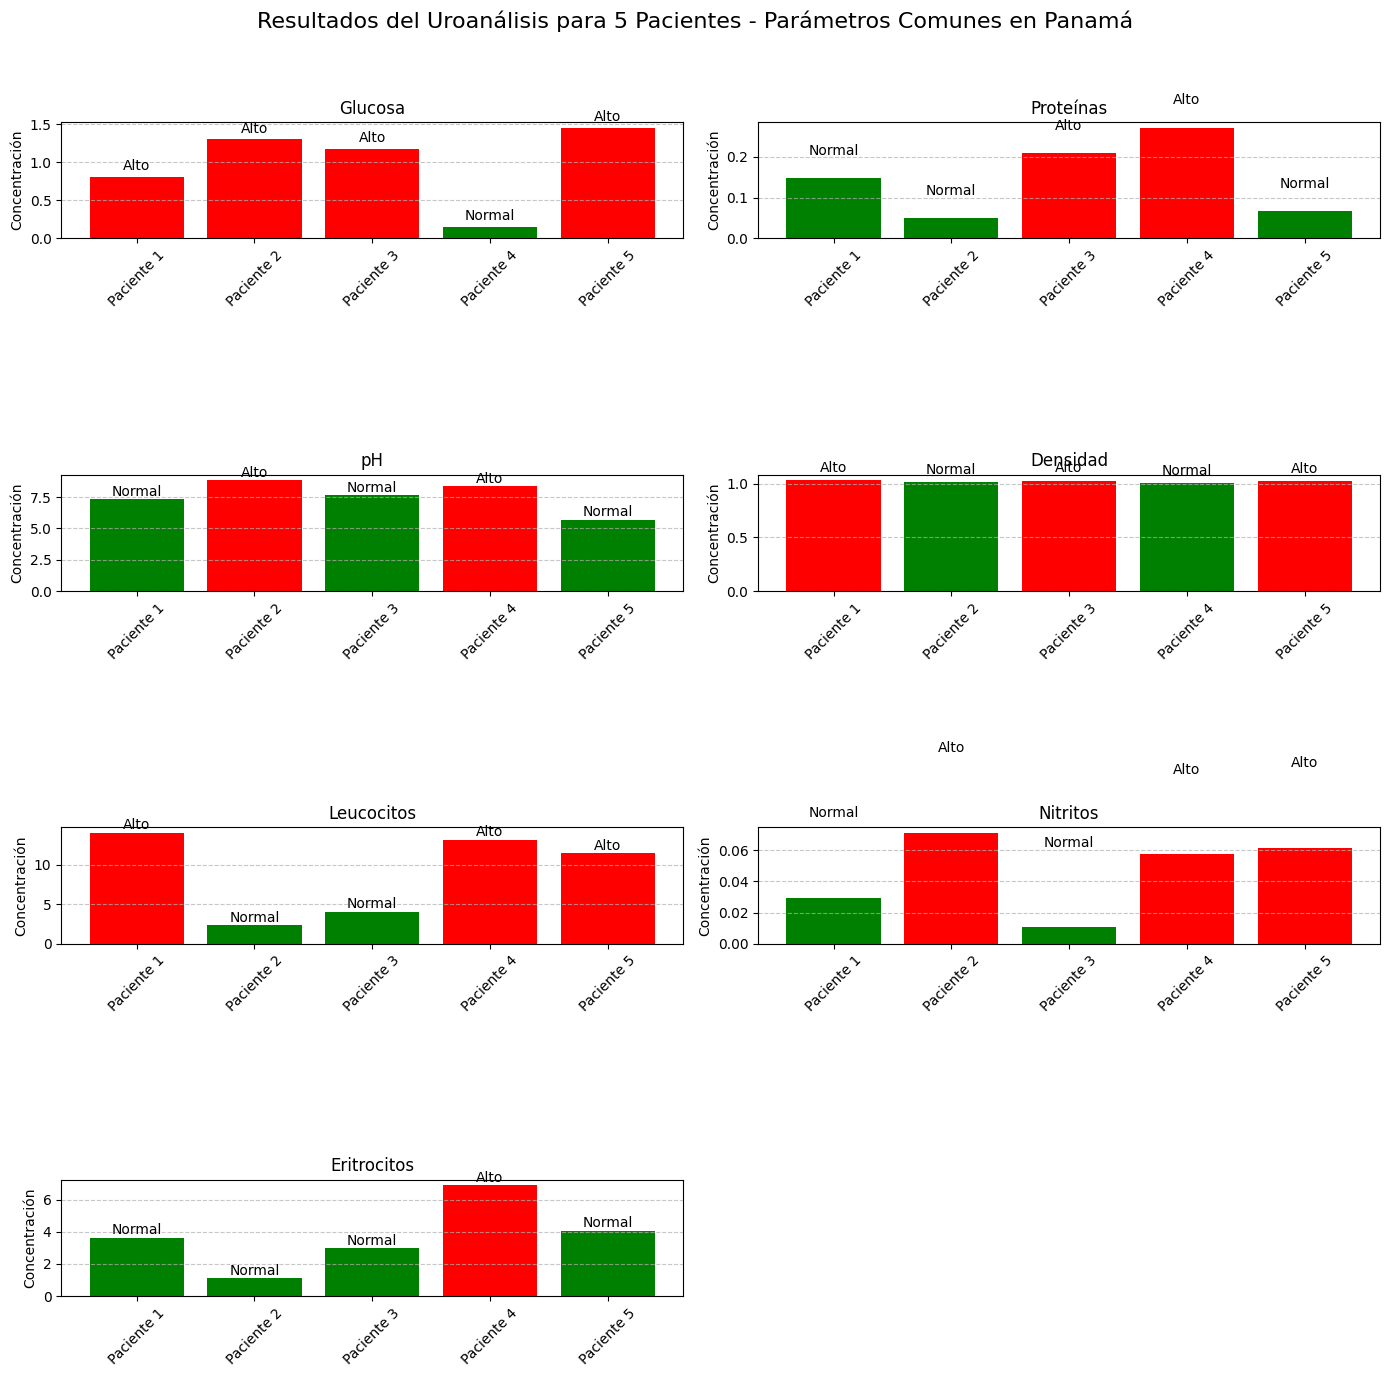

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Rangos de referencia adicionales para un uroanálisis en Panamá
rangos_uroanalisis = {
    "Glucosa": {"bajo": 0, "normal": (0, 0.8), "alto": 0.8},
    "Proteínas": {"bajo": 0, "normal": (0, 0.15), "alto": 0.15},
    "pH": {"bajo": 4.5, "normal": (4.5, 8.0), "alto": 8.0},
    "Densidad": {"bajo": 1.005, "normal": (1.005, 1.025), "alto": 1.025},
    "Leucocitos": {"bajo": 0, "normal": (0, 10), "alto": 10},
    "Nitritos": {"bajo": 0, "normal": (0, 0.05), "alto": 0.05},
    "Eritrocitos": {"bajo": 0, "normal": (0, 5), "alto": 5},
}

# Datos de ejemplo para 5 pacientes en un uroanálisis en Panamá
pacientes_panama = {
    f"Paciente {i+1}": {
        "Glucosa": random.uniform(0, 1.5),
        "Proteínas": random.uniform(0, 0.3),
        "pH": random.uniform(4.0, 9.0),
        "Densidad": random.uniform(1.000, 1.035),
        "Leucocitos": random.uniform(0, 15),
        "Nitritos": random.uniform(0, 0.08),
        "Eritrocitos": random.uniform(0, 7),
    }
    for i in range(5)
}

# Función para clasificar valores según rangos
def clasificar_parametro(valor, rango):
    if valor < rango["bajo"]:
        return "Bajo"
    elif rango["normal"][0] <= valor <= rango["normal"][1]:
        return "Normal"
    elif valor > rango["alto"]:
        return "Alto"
    else:
        return "Indeterminado"

# Crear listas para graficar
parametros = list(rangos_uroanalisis.keys())
datos_graficos = {param: [] for param in parametros}
clasificaciones = {param: [] for param in parametros}
pacientes_nombres = list(pacientes_panama.keys())

# Clasificar y preparar datos para graficar
for paciente, resultados in pacientes_panama.items():
    for parametro, valor in resultados.items():
        clasificacion = clasificar_parametro(valor, rangos_uroanalisis[parametro])
        datos_graficos[parametro].append(valor)
        clasificaciones[parametro].append(clasificacion)

# Graficar resultados para cada parámetro
fig, axes = plt.subplots(4, 2, figsize=(14, 14))  # Crear una figura con subgráficos
fig.suptitle("Resultados del Uroanálisis para 5 Pacientes - Parámetros Comunes en Panamá", fontsize=16)

colors = {"Bajo": "skyblue", "Normal": "green", "Alto": "red"}

for i, parametro in enumerate(parametros):
    ax = axes[i // 2, i % 2]  # Organizar subgráficos
    valores = datos_graficos[parametro]
    clasif_colores = [colors[clasif] for clasif in clasificaciones[parametro]]

    # Graficar barras con colores según la clasificación
    bars = ax.bar(pacientes_nombres, valores, color=clasif_colores)

    # Anotar la clasificación encima de cada barra
    for bar, clasif in zip(bars, clasificaciones[parametro]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05, clasif, ha='center', va='bottom', fontsize=10)

    ax.set_title(f"{parametro}")
    ax.set_ylabel("Concentración")
    ax.set_xticks(range(len(pacientes_nombres)))
    ax.set_xticklabels(pacientes_nombres, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ocultar subgráfico vacío si hay un espacio adicional
if len(parametros) % 2 != 0:
    axes[-1, -1].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajustar para el título general
plt.show()
